In [79]:
%load_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

import os
import sys
import pickle
import pandas as pd
from utils import key2df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [80]:
from utils import key2df, df2dict
from utils import compute_eer

In [81]:
def read_trace(trace_dir):
    trial_conf = trace_dir.split("/")[-1]
    posScore = pickle.load(open(trace_dir+'/posScores.pkl', 'rb'))
    negScore = pickle.load(open(trace_dir+'/negScores.pkl', 'rb'))
    answers = pickle.load(open(trace_dir+'/answers.pkl', 'rb'))
    
    return posScore, negScore, answers

In [82]:
def evalute_trace(posScore, negScore, answers):
    acc = answers[0]/(answers[0]+answers[1])
    eer = compute_eer(posScore, negScore)
    
    return eer, acc

In [83]:
keys = pickle.load(open("xvector_embeds/sv_keys.pkl", "rb"))
key_df = key2df(keys)
id2idx, idx2id = df2dict(key_df) 

## trial-wise error reduction

In [84]:
# spk, enr_idx, n_trial, n_correct, n_wrong, acc, eer, fpr, fnr, {is_enroll}
meta = pickle.load(open("/dataset/muncok/experiments/sv_exps/icassp2019/adaptive_sv_icassp19/test/n_enr_full_pRatio_0.9/result.pkl", "rb"))
meta1 = pickle.load(open("/dataset/muncok/experiments/sv_exps/icassp2019/adaptive_sv_icassp19/test/n_enr_3_pRatio_0.9/result.pkl", "rb"))

In [85]:
meta_sorted = sorted(meta, key=lambda x: x[1])
meta_sorted1 = sorted(meta1, key=lambda x: x[1])

In [86]:
err_dec = [] 
err_inc = []
for m, m1 in zip(meta_sorted, meta_sorted1):
    assert m[1] == m1[1], f"{m[1]}, {m1[1]}"
    base_err = 1-m[5]
    inc_err = 1-m1[5]
    if base_err == 0:
        err_dec += [0]
    elif base_err < inc_err:
        err_inc += [inc_err/base_err]
    else:
        err_dec += [1-inc_err/base_err]

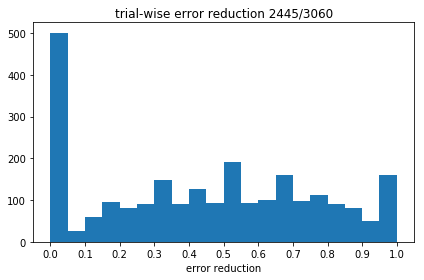

In [88]:
n_inc = len(err_inc)
n_dec = len(err_dec)
avg_err_inc = np.mean(err_inc)
plt.title("trial-wise error reduction {}/{}".format(n_dec, len(meta_sorted)))
plt.hist(err_dec, bins=20, range=[0, 1], align='mid')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel("error reduction")
plt.tight_layout()
plt.show()

## FPR, FNR graph

In [87]:
m_fprs = []
m_fnrs = []
for m in meta_sorted:
    m_fprs += [m[7]]
    m_fnrs += [m[8]]

In [21]:
np.mean(m_fprs)

0.07829825802371757

In [22]:
np.mean(m_fnrs)

0.05289954757295167

In [25]:
m1_fprs = []
m1_fnrs = []
for m1 in meta_sorted1:
    m1_fprs += [m1[7]]
    m1_fnrs += [m1[8]]

In [26]:
np.mean(m1_fprs)

0.060572323105785156

In [27]:
np.mean(m1_fnrs)

0.029433955881039763

## Treshold plot 

acc: 0.9615384615384616


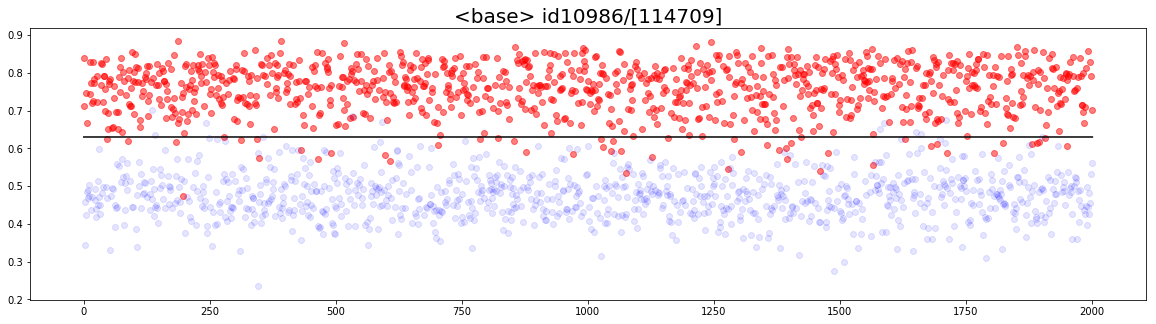

In [77]:
# base setting
meta_ths = pickle.load(open("adaptive_sv_icassp19/test/base/n_enr_full_pRatio_0.5/result.pkl", "rb"))

t_idx = 2
enr_spk = meta_ths[t_idx][0]
enr_uttr = meta_ths[t_idx][1]
scores = meta_ths[t_idx][-2]
labels = meta_ths[t_idx][-1]

print("acc: {}".format(meta_ths[t_idx][5]))

pos_score_idx = np.nonzero(labels)[0]
neg_score_idx = np.nonzero(1-labels)[0]

plt.figure(figsize=(20,5))
plt.title("<base> {}/{}".format(enr_spk, enr_uttr), fontsize=20)
plt.plot([0.6302]*len(scores), color='k')
plt.scatter(pos_score_idx, scores[pos_score_idx], alpha=0.5, color='r')
plt.scatter(neg_score_idx, scores[neg_score_idx], alpha=0.1, color='b')
# plt.ylim([0.5, 0.6])
# plt.tight_layout()
plt.show()

acc: 0.9590409590409591


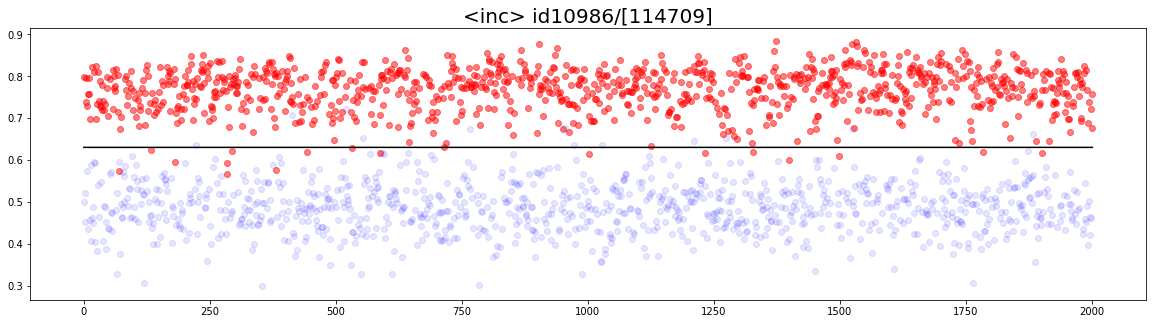

In [90]:
# inc setting
meta_ths = pickle.load(open("adaptive_sv_icassp19/test/inc/n_enr_5_pRatio_0.5/result.pkl", "rb"))
t_idx = 1

enr_spk = meta_ths[t_idx][0]
enr_uttr = meta_ths[t_idx][1]
scores = meta_ths[t_idx][-3]
labels = meta_ths[t_idx][-2]
thresholds = np.array(meta_ths[t_idx][-1])
enroll_decision = meta_ths[t_idx][7]

print("acc: {}".format(meta_ths[t_idx][3]))

pos_score_idx = np.nonzero(labels)[0]
neg_score_idx = np.nonzero(1-labels)[0]

plt.figure(figsize=(20,5))
plt.title("<inc> {}/{}".format(enr_spk, enr_uttr), fontsize=20)
# plt.plot(thresholds, color='k')
plt.plot([0.6302]*len(scores), color='k')
plt.scatter(pos_score_idx, scores[pos_score_idx], alpha=0.5, color='r')
plt.scatter(neg_score_idx, scores[neg_score_idx], alpha=0.1, color='b')
# plt.ylim([0.5, 0.6])
plt.show()

acc: 0.9565434565434565


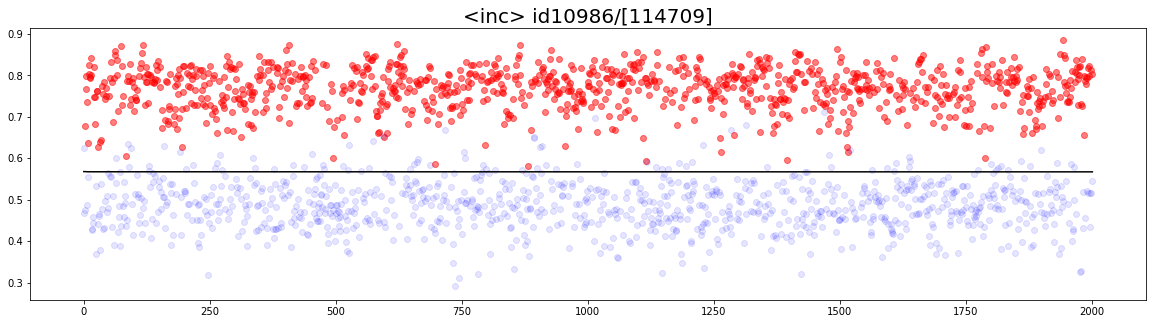

In [92]:
# inc setting
meta_ths = pickle.load(open("adaptive_sv_icassp19/test/inc/n_enr_5_pRatio_0.5_thresUpdt/result.pkl", "rb"))
t_idx = 1

enr_spk = meta_ths[t_idx][0]
enr_uttr = meta_ths[t_idx][1]
scores = meta_ths[t_idx][-3]
labels = meta_ths[t_idx][-2]
thresholds = np.array(meta_ths[t_idx][-1])
enroll_decision = meta_ths[t_idx][7]

print("acc: {}".format(meta_ths[t_idx][3]))

pos_score_idx = np.nonzero(labels)[0]
neg_score_idx = np.nonzero(1-labels)[0]

plt.figure(figsize=(20,5))
plt.title("<inc> {}/{}".format(enr_spk, enr_uttr), fontsize=20)
plt.plot(thresholds, color='k')
# plt.plot([0.6302]*len(scores), color='k')
plt.scatter(pos_score_idx, scores[pos_score_idx], alpha=0.5, color='r')
plt.scatter(neg_score_idx, scores[neg_score_idx], alpha=0.1, color='b')
# plt.ylim([0.5, 0.6])
plt.show()

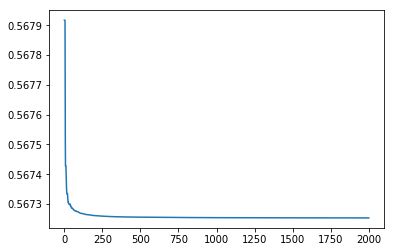

In [93]:

plt.plot(thresholds)

## Score normalization

아직까지는 눈에 보일만한 향상이 나오지 않는다.

In [37]:
val_df = pd.read_pickle("icassp2019/trials/enr306_uttr1/valdiation_df.pkl")
sv_embeds = np.load("icassp2019/xvector_embeds/sv_embeds.npy")

In [38]:
cohort_set = val_df.groupby("spk", group_keys=False).apply(lambda x: x.sample(n=3))
cohort_embeds = sv_embeds[cohort_set.embed_id]

In [40]:
np.save("icassp2019/xvector_embeds/cohort_embeds.npy", cohort_embeds)

In [41]:
cohort_embeds.shape

(2835, 512)

## Threshold Decision

In [57]:
from compute_min_dcf import ComputeErrorRates, ComputeMinDcf

def compute_minDCF(scores, labels, c_miss=1.0, c_fa=1.0, p_target=0.01):                                                                                                                                                                                                                
    fnrs, fprs, thresholds = ComputeErrorRates(scores, labels)                                                                                                                                                                                                                          
    mindcf, threshold = ComputeMinDcf(fnrs, fprs, thresholds, p_target,                                                                                                                                                                                                                 
         c_miss, c_fa)                                                                                                                                                                                                                                                                  
    print("minDCF is {0:.4f} at threshold {1:.4f} (p-target={2}, c-miss={3},"                                                                                                                                                                                                           
        " c-fa={4})".format(mindcf, threshold, p_target, c_miss, c_fa))

In [53]:
trial_for_thresh = pd.read_pickle('icassp2019/trials/enr306_uttr1/trial_for_thresh.pkl')
trial_for_thresh = trial_for_thresh.sample(n=10000).reset_index()

In [59]:
from sklearn.metrics import roc_curve
from torch.nn.functional import cosine_similarity as cosine
import torch

sv_embeds_tensor = torch.from_numpy(sv_embeds)

scores = cosine(sv_embeds_tensor[trial_for_thresh.enrolment_id], 
                sv_embeds_tensor[trial_for_thresh.test_id], dim=1).numpy()
labels = trial_for_thresh.label
fprs, tprs, thres = roc_curve(labels, scores, pos_label=True)

In [60]:
eer_thres = thres[np.nanargmin(np.abs(fprs - (1 - tprs)))]
best_thres = thres[np.argmax(tprs + (1- fprs))]

In [61]:
fpr_05 = thres[np.where(fprs < 0.05)[0][-1]]

In [62]:
for p in [0.01, 0.1, 0.5, 0.9]:
    compute_minDCF(scores, labels, c_miss=1.0, c_fa=10.0, p_target=p)

minDCF is 0.4750 at threshold 0.7101 (p-target=0.01, c-miss=1.0, c-fa=10.0)
minDCF is 0.4416 at threshold 0.6945 (p-target=0.1, c-miss=1.0, c-fa=10.0)
minDCF is 0.2976 at threshold 0.6302 (p-target=0.5, c-miss=1.0, c-fa=10.0)
minDCF is 0.1414 at threshold 0.5705 (p-target=0.9, c-miss=1.0, c-fa=10.0)


In [246]:
vT = best_thres
eT = thres[np.where(fprs < 0.001)[0][-1]]
print('Accept Thres: {:.5f}, Enroll Thres: {:.5f}'.format(vT, eT))

Accept Thres: 0.57365, Enroll Thres: 0.71408


In [243]:
type(trial_for_thresh)

pandas.core.frame.DataFrame

In [ ]:
scores = cosine(sv_embeds[trial_for_thresh.enrolment_id], sv_embeds[trial_for_thresh.test_id], dim=1).numpy()